# AirBnB capstone project




# Predicting Airbnb price with Machine Learning for San Francisco

### Overview:<br>
Airbnb(Air bed and breakfast)
Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. 
Since Airbnb has started more people are using the platform to list their house/apartment/room… for short term rent. The host can rent the place from one night to months. Sometimes the host will rent their house when they are away for a week. <br>
The challenge that the host face is find the right price for their listing. One way they can do it is by searching similar places and see what are those listed as and then estimate a price for their listing but this is not accurate and it does not include all the information. (for example the user may think only number of bedrooms is important whereas there are many factors in predicting the price)
So having a tool for predicting the listing price of an Airbnb that takes into consideration several factor (location, number of bedrooms, time of the year for listing,..) would help the host estimate their listing.



## Data<br>
I am using the data from http://insideairbnb.com/get-the-data.html and it is free. The data is as of November 30 ,2019. It contains about 8533 record for San Francisco.


### Exploring Data and Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from IPython.display import display
import matplotlib.pyplot as plt

# Set iPython's max column width to 200
pd.set_option('display.max_columns', 200)

#reading raw data
in_file = 'listings.csv'
full_data = pd.read_csv(in_file)


full_data.head()
full_data.tail()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
8528,40544136,https://www.airbnb.com/rooms/40544136,20191204162709,2019-12-04,Entire apartment in Pacific Heights/beautiful ...,A place for zen with a beautiful patio and bac...,NaN,A place for zen with a beautiful patio and bac...,none,NaN,NaN,NaN,NaN,NaN,We would appreciate if don’t wear any shoes in...,NaN,NaN,https://a0.muscache.com/im/pictures/cac19a4c-0...,NaN,39425074,https://www.airbnb.com/users/show/39425074,Sam,2015-07-24,"San Francisco, California, United States",NaN,within a day,50%,NaN,f,https://a0.muscache.com/im/pictures/user/3cffe...,https://a0.muscache.com/im/pictures/user/3cffe...,NaN,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"San Francisco, CA, United States",NaN,Pacific Heights,NaN,San Francisco,CA,94115,San Francisco,"San Francisco, CA",US,United States,37.79017,-122.43869,f,Apartment,Entire home/apt,2,1.5,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Indoor fi...",NaN,$95.00,NaN,NaN,$0.00,$50.00,1,$0.00,30,180,30,30,180,180,30.0,180.0,yesterday,t,2,32,62,337,2019-12-04,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,"{""SAN FRANCISCO""}",t,f,flexible,f,f,2,1,1,0,NaN
8529,40546145,https://www.airbnb.com/rooms/40546145,20191204162709,2019-12-04,Huge Private Room; 8 min to Dwntwn SF & SFO,We are kind and friendly people looking for wo...,NaN,We are kind and friendly people looking for wo...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/b220ab0d-f...,NaN,313682675,https://www.airbnb.com/users/show/313682675,Connor,2019-12-02,US,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/b9a50...,https://a0.muscache.com/im/pictures/user/b9a50...,Bayview,0.0,0.0,"['email', 'phone']",t,f,"San Francisco, CA, United States",NaN,Bayview,NaN,San Francisco,CA,94124,San Francisco,"San Francisco, CA",US,United States,37.71977,-122.39214,t,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Heating,""Smoke detector"",""Carbon monoxid...",NaN,$55.00,NaN,NaN,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,today,t,30,59,59,59,2019-12-04,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,City Registration Pending,"{""SAN FRANCISCO""}",t,f,flexible,f,f,2,0,2,0,NaN
8530,40547706,https://www.airbnb.com/rooms/40547706,20191204162709,2019-12-04,Welcome onboard a beautiful Sail

In [2]:
type(full_data)

pandas.core.frame.DataFrame

In [3]:
full_data.shape

(8533, 106)

In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 6.9+ MB


In [5]:
#show all the columns name
full_data.columns
for col in full_data.columns:
    print(col)
    #full_data.col.unique()


id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [6]:
full_data.index

RangeIndex(start=0, stop=8533, step=1)

In [7]:
full_data.neighbourhood.unique()

array(['Duboce Triangle', 'Inner Sunset', 'Bernal Heights', 'Cole Valley',
       'Alamo Square', 'Mission District', 'Potrero Hill', 'Nob Hill',
       'Lower Haight', 'Hayes Valley', 'Union Square', 'Haight-Ashbury',
       'The Castro', 'South Beach', 'Noe Valley', 'Western Addition/NOPA',
       'Richmond District', 'Presidio Heights', 'Glen Park', 'Dogpatch',
       'Ingleside', 'Pacific Heights', 'Downtown', 'Financial District',
       'Twin Peaks', 'Russian Hill', 'Outer Sunset', 'Marina',
       'Excelsior', 'Chinatown', 'Civic Center', 'Tenderloin',
       'Balboa Terrace', 'Bayview', 'Telegraph Hill', 'Diamond Heights',
       'Cow Hollow', 'West Portal', 'North Beach', 'Mission Terrace',
       'SoMa', 'Sunnyside', 'Parkside', 'Lakeshore', "Fisherman's Wharf",
       'Crocker Amazon', 'Oceanview', 'Portola', 'Presidio',
       'Forest Hill', 'Visitacion Valley', 'Mission Bay', 'Sea Cliff',
       'Japantown', 'Daly City', nan], dtype=object)

In [8]:
#Get a series object containing the count of unique elements in each column of dataframe
uniqueValues = full_data.nunique().sort_values()
print("Count of unique values in each column:")
print(uniqueValues)

Count of unique values in each column:
xl_picture_url                     0
host_acceptance_rate               0
medium_url                         0
neighbourhood_group_cleansed       0
thumbnail_url                      0
                                ... 
description                     7495
picture_url                     8158
name                            8174
listing_url                     8533
id                              8533
Length: 106, dtype: int64


In [9]:
#columns that have only one unique value can be dropped
columns_to_drop = ['country_code', 'scrape_id', 'country', 'has_availability', 'experiences_offered', 'is_business_travel_ready' ]   
df = full_data.drop(columns_to_drop, axis = 1)
#note: default axis is 0 which is row. needed to specify axis=1

df.shape


(8533, 100)

In [10]:
# URL columns are not needed , they will be dropped
columns_with_url = ['listing_url', 'thumbnail_url', 'medium_url', 'picture_url',
'xl_picture_url','host_thumbnail_url','host_picture_url','host_url']
df = df.drop(columns_with_url, axis = 1)

In [11]:
df.shape


(8533, 92)

In [12]:
#full_data.iloc[2:3,]
#full_data.scrape_id

In [13]:
# this can be dropped as well last_scraped,calendar_last_scraped 
df.last_scraped.unique()
df.calendar_last_scraped.unique()

array(['2019-12-04', '2019-12-05'], dtype=object)

In [14]:
df = df.drop (['last_scraped','calendar_last_scraped'], axis = 1)

In [15]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 90 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8533 non-null   int64  
 1   name                                          8533 non-null   object 
 2   summary                                       8320 non-null   object 
 3   space                                         7325 non-null   object 
 4   description                                   8492 non-null   object 
 5   neighborhood_overview                         6422 non-null   object 
 6   notes                                         5216 non-null   object 
 7   transit                                       5927 non-null   object 
 8   access                                        5289 non-null   object 
 9   interaction                                   5729 non-null   o

,id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.533000e+03,8.533000e+03,0.0,8479.000000,8479.000000,0.0,8533.000000,8533.000000,8533.000000,8528.000000,8530.000000,8521.000000,126.000000,8533.000000,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,6601.000000,6596.000000,6596.000000,6595.000000,6597.000000,6595.000000,6595.000000,8533.000000,8533.000000,8533.000000,8533.000000,6642.000000
mean,2.138645e+07,6.773439e+07,NaN,101.524000,101.524000,NaN,37.766350,-122.429779,3.130435,1.403494,1.338804,1.726323,1041.857143,1.702098,1.173567e+04,1.225990e+04,1.173555e+04,1.174133e+04,1.018933e+06,1.018939e+06,1.174042e+04,1.018938e+06,10.966366,25.393179,41.709598,151.997539,44.785656,13.339623,95.524769,9.759248,9.611734,9.852464,9.825830,9.688400,9.383321,27.760811,21.381695,5.352045,0.675026,1.842879
std,1.283860e+07,8.606154e+07,NaN,340.811785,340.811785,NaN,0.022813,0.027010,1.897818,0.931233,0.927230,1.187167,826.489450,1.327286,1.082553e+06,1.082548e+06,1.082553e+06,1.082553e+06,4.649946e+07,4.649946e+07,1.082553e+06,4.649946e+07,11.246103,22.508991,34.473555,136.858553,79.476654,22.385516,7.258059,0.703041,0.804334,0.564258,0.629148,0.716657,0.840563,66.028408,58.987020,15.875233,3.354536,2.077444
min,9.580000e+02,2.800000e+01,NaN,0.000000,0.000000,NaN,37.704480,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.779327e+06,4.430421e+06,NaN,1.000000,1.000000,NaN,37.751770,-122.442520,2.000000,1.000000,1.000000,1.000000,500.000000,1.000000,2.000000e+00,2.900000e+01,2.000000e+00,2.000000e+00,2.900000e+01,2.900000e+01,2.000000e+00,2.900000e+01,0.000000,0.000000,1.000000,13.000000,1.000000,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.290000
50%,2.259754e+07,2.374145e+07,NaN,2.000000,2.000000,NaN,37.769780,-122.424060,2.000000,1.000000,1.000000,1.000000,851.500000,1.000000,4.000000e+00,1.800000e+02,4.000000e+00,5.000000e+00,2.100000e+02,3.600000e+02,4.000000e+00,3.559000e+02,8.000000,24.000000,44.000000,112.000000,9.000000,2.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.270356e+07,1.074344e+08,NaN,16.000000,16.000000,NaN,37.785570,-122.410500,4.000000,1.500000,2.000000,2.000000,1497.500000,2.000000,3.000000e+01,1.125000e+03,3.000000e+01,3.000000e+01,1.125000e+03,1.125000e+03,3.000000e+01,1.125000e+03,21.000000,46.000000,75.000000,304.000000,52.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,2.000000,2.000000,0.000000,2.780000
max,4.056928e+07,3.136827e+08,NaN,1768.000000,1768.000000,NaN,37.828790,-122.368570,16.000000,14.000000,16.000000,14.000000,5500.000000,16.000000,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,2.147484e+09,2.147484e+09,1.000000e+08,2.147484e+09,

In [16]:
# we can see the values for these 2 columns are all null 
#so we can drop trhem (host_acceptance_rate,neighbourhood_group_cleansed)

df.host_acceptance_rate.value_counts(dropna=False)
df.neighbourhood_group_cleansed.value_counts(dropna=False)

NaN    8533
Name: neighbourhood_group_cleansed, dtype: int64

In [17]:
# dropping host_acceptance_rate,neighbourhood_group_cleansed

null_columns = ['host_acceptance_rate', 'neighbourhood_group_cleansed']
df = df.drop (null_columns , axis = 1)

In [18]:
df.shape

(8533, 88)

In [19]:
# dropping more columns that are more text since I will not be using NLP
text_col_to_drop = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules','host_name', 'host_location', 'host_about', 'host_neighbourhood', 'host_verifications']
df = df.drop(text_col_to_drop, axis=1)


In [20]:
#df.head()
#df.info()

In [21]:
# we need to clean this. San Francisco is typed differently where it is only one value
#df.smart_location.value_counts(dropna=False)
#df.city.value_counts(dropna=False)
#df.host_is_superhost.unique()
#columns that have mostly nul lwill be dropped
df.isnull().sum().sort_values(ascending=False)

square_feet                                    8407
monthly_price                                  7507
weekly_price                                   7480
license                                        3243
review_scores_location                         1938
                                               ... 
maximum_nights                                    0
minimum_nights                                    0
calculated_host_listings_count_shared_rooms       0
guests_included                                   0
id                                                0
Length: 73, dtype: int64

In [22]:
df['square_feet']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8528   NaN
8529   NaN
8530   NaN
8531   NaN
8532   NaN
Name: square_feet, Length: 8533, dtype: float64

In [23]:
# Although square feet seems to be an important feature, we will drop it ecause it is all Null 
df.drop(['square_feet', 'monthly_price', 'weekly_price', 'license'], axis=1, inplace = True)

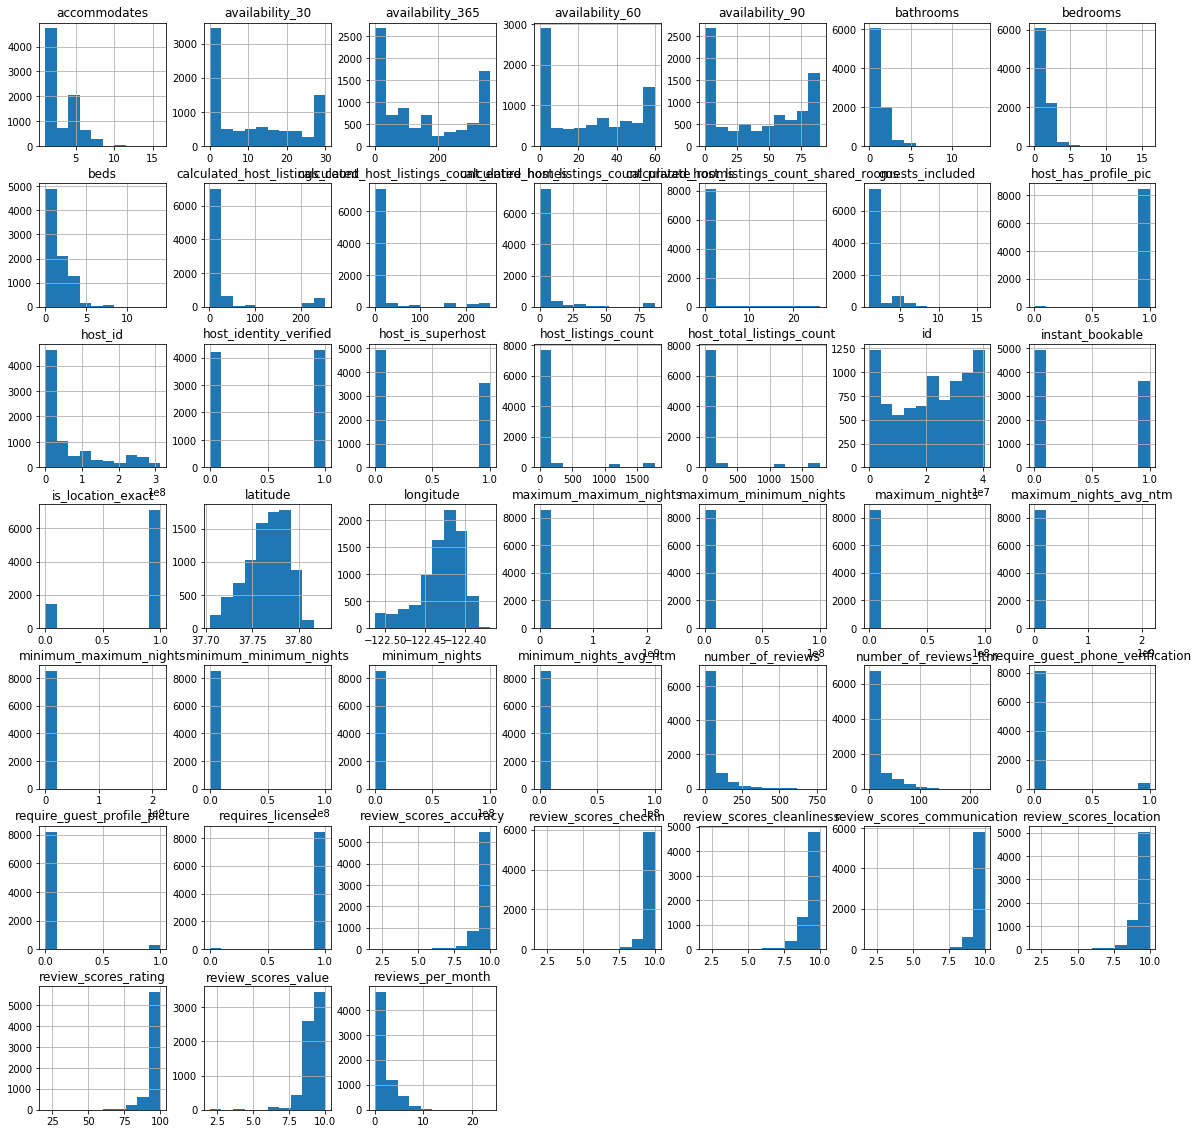

In [24]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20))
plt.show()

In [25]:
# based on the graphs above some of the columns seems to have mostly one value so will drop those
df.drop(['maximum_nights_avg_ntm' , 'minimum_nights_avg_ntm' , 'maximum_maximum_nights', 'minimum_maximum_nights', 'maximum_minimum_nights', 'minimum_minimum_nights','requires_license','require_guest_profile_picture','is_location_exact','host_listings_count','require_guest_phone_verification','host_has_profile_pic','minimum_nights','maximum_nights'], axis=1, inplace = True)

In [26]:
#df.info()

In [27]:
#dropping more columns regarding Host since our focus is to predic the price and we will not consider the relationship to the host for this problem
columns_to_drop =['number_of_reviews','number_of_reviews_ltm','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month','host_response_time','host_response_rate']  
df = df.drop(columns_to_drop, axis = 1)


In [28]:
#df.info()

In [29]:
df.city.value_counts(dropna=False)
df.street.value_counts(dropna=False)

San Francisco, CA, United States                  8460
Daly City, CA, United States                        41
CA, CA, United States                                9
San Francisco, United States                         6
San Francisco, Ca, United States                     4
San Francisco , CA, United States                    2
Nor cal, CA, United States                           1
Brisbane, CA, United States                          1
San Fàncisco, CA, United States                      1
San Francisco , Ca, United States                    1
San Franscisco, CA, United States                    1
Noe Valley - San Francisco, CA, United States        1
San Jose, CA, United States                          1
Daily city , Ça, United States                       1
South San Francisco, CA, United States               1
San Francisco, Hayes Valley, CA, United States       1
US, United States                                    1
Name: street, dtype: int64

In [30]:
#checking for outliers
df.loc[df['street'] == 'San Jose, CA, United States']


,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_30,availability_60,availability_90,availability_365,jurisdiction_names
7123,35705896,107434423,2016-12-16,0.0,1068.0,0.0,"San Jose, CA, United States",Nob Hill,Nob Hill,San Jose,CA,94109,San Francisco,"San Jose, CA",37.79448,-122.41495,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",$183.00,NaN,$148.00,1,$0.00,today,0,0,0,275,"{""SAN FRANCISCO""}"


In [31]:
df.drop(df.loc[df['street'] == 'San Jose, CA, United States'].index, inplace = True)

In [32]:
df.drop('street', axis = 1, inplace=True)
df.drop('city', axis = 1, inplace=True)


In [33]:
df.state.value_counts(dropna=False)

CA     8519
NaN       7
Ca        5
Ça        1
Name: state, dtype: int64

In [34]:
df.market.value_counts(dropna=False)

San Francisco    8511
NaN                20
D.C.                1
Name: market, dtype: int64

In [35]:
# looking for the outlier "D.C." . After looking at the data it looks like this row is fine and only the value for this column is not. 
#Anyways this colum needs to be dropped
df.loc[df['market'] == 'D.C.']

,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,state,zipcode,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_30,availability_60,availability_90,availability_365,jurisdiction_names
3076,16241036,6884880,2013-06-12,0.0,1.0,0.0,Noe Valley,Noe Valley,CA,94114,D.C.,"San Francisco, CA",37.75241,-122.43169,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer...",$150.00,NaN,$100.00,1,$0.00,today,1,1,1,62,"{""SAN FRANCISCO""}"


In [36]:
df.smart_location.value_counts(dropna=False)

San Francisco, CA                  8460
Daly City, CA                        41
CA                                    9
San Francisco                         6
San Francisco, Ca                     4
San Francisco , CA                    2
Brisbane, CA                          1
Nor cal, CA                           1
San Fàncisco, CA                      1
San Francisco, Hayes Valley, CA       1
San Franscisco, CA                    1
South San Francisco, CA               1
Noe Valley - San Francisco, CA        1
US,                                   1
San Francisco , Ca                    1
Daily city , Ça                       1
Name: smart_location, dtype: int64

In [37]:
df.loc[df['smart_location'] == 'CA']

,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,state,zipcode,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_30,availability_60,availability_90,availability_365,jurisdiction_names
4424,23294064,48005494,2015-11-02,1.0,1768.0,1.0,The Castro,Castro/Upper Market,CA,NaN,San Francisco,CA,37.76085,-122.43031,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,""...",$180.00,$500.00,$300.00,1,$0.00,3 weeks ago,25,55,85,360,NaN
4425,23294094,48005494,2015-11-02,1.0,1768.0,1.0,The Castro,Castro/Upper Market,CA,NaN,San Francisco,CA,37.76135,-122.43027,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",$300.00,$500.00,$470.00,1,$0.00,4 weeks ago,1,1,1,248,NaN
4482,23524100,48005494,2015-11-02,1.0,1768.0,1.0,South Beach,South of Market,CA,NaN,San Francisco,CA,37.77948,-122.39166,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$166.00,$500.00,$300.00,1,$0.00,3 days ago,0,0,0,0,NaN
4483,23524153,48005494,2015-11-02,1.0,1768.0,1.0,South Beach,South of Market,CA,NaN,San Francisco,CA,37.77896,-122.39193,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$242.00,$500.00,$410.00,1,$0.00,yesterday,30,60,90,288,NaN
4484,23524176,48005494,2015-11-02,1.0,1768.0,1.0,South Beach,South of Market,CA,NaN,San Francisco,CA,37.77934,-122.39242,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$223.00,$500.00,$410.00,1,$0.00,2 weeks ago,20,50,80,278,NaN
4487,23543739,48005494,2015-11-02,1.0,1768.0,1.0,Hayes Valley,Western Addition,CA,NaN,San Francisco,CA,37.77448,-122.42497,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",$145.00,$500.00,$300.00,1,$0.00,a week ago,0,15,45,320,NaN
4488,23545253,48005494,2015-11-02,1.0,1768.0,1.0,Hayes Valley,Western Addition,CA,NaN,San Francisco,CA,37.77467,-122.42547,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",$159.00,$500.00,$300.00,1,$0.00,3 days ago,0,0,0,0,NaN
4529,23684272,48005494,2015-11-02,1.0,1768.0,1.0,SoMa,South of Market,CA,NaN,San Francisco,CA,37.78298,-122.39046,Condominium,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",$171.00,$500.00,$300.00,1,$0.00,2 weeks ago,2,2,2,2,NaN
6750,34179551,48005494,2015-11-02,1.0,1768.0,1.0,Nob Hill,Nob Hill,CA,NaN,San Francisco,CA,37.79385,-122.41476,Condominium,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets all...",$182.00,$500.00,$360.00,1,$0.00,3 days ago,0,0,0,0,NaN


In [38]:
df.drop('smart_location', axis = 1, inplace=True)

In [39]:
df.jurisdiction_names.value_counts(dropna=False)

{"SAN FRANCISCO"}          8480
NaN                          51
{"Solano County"," CA"}       1
Name: jurisdiction_names, dtype: int64

In [40]:
df.drop(['state', 'market', 'jurisdiction_names'], axis=1, inplace = True)

In [41]:
df.property_type.value_counts()

Apartment             3465
House                 2375
Condominium            910
Guest suite            592
Boutique hotel         338
Hotel                  145
Townhouse              142
Loft                   132
Serviced apartment     110
Hostel                  77
Aparthotel              66
Guesthouse              45
Bed and breakfast       33
Other                   23
Resort                  18
Cottage                 17
Bungalow                15
Castle                   6
Villa                    6
Cabin                    3
Tiny house               3
Boat                     3
Camper/RV                2
In-law                   2
Earth house              2
Hut                      1
Dome house               1
Name: property_type, dtype: int64

In [42]:
df.bed_type.value_counts()

Real Bed         8460
Futon              32
Pull-out Sofa      21
Airbed             12
Couch               7
Name: bed_type, dtype: int64

In [43]:
# most have same bed type so will drop this
df.drop('bed_type', axis = 1, inplace=True)

In [44]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'En suite bathroom',
 'Espresso machine

In [45]:
import collections
total_amenities = collections.Counter(amenities_set)
count = sum(total_amenities[t] for t in total_amenities)
print (count)

186


In [46]:
df.amenities[0]

'{TV,"Cable TV",Internet,Wifi,Kitchen,"Pets live on this property",Dog(s),Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Keypad,"Private entrance","Pack ’n Play/travel crib","Room-darkening shades","Hot water",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware",Oven}'

In [47]:
#df.info()

In [48]:
df["First_aid_kit"] = 0
df["Exercise_equipment"] = 0
df["Formal_dining_area"] = 0
df["Free_on_premises_parking"] = 0
df["Free_street_parking"] = 0
df["Lake_access"] = 0
df["Essentials"] = 0
df["Fire_pit"] = 0
df["Flat_path_guest_entrance"] = 0
df["Garden_backyard"] = 0
df["Hangers"] = 0
df["Heat_lamps"] = 0
df["Heated_floors"] = 0
df["Heating"] = 0
df["Hot_water"] = 0
df["Luggage_dropoff"] = 0
df["Mudroom"] = 0
df["Lock_on_bedroom_door"] = 0
df["Mountain_view"] = 0
df["Paid_parking_off_premises"] = 0
df["toilet"] = 0
df["Warming_drawer"] = 0
df["Ski_In_out"] = 0
df["Private_living_room"] = 0
df["Single_level_home"] = 0
df["Paid_parking_on_premises"] = 0
df["Safety_card"] = 0
df["Keypad"] = 0
df["shared_amenities"] = 0
df["Stair_gates"] = 0
df["Standing_valet"] = 0
df["Doorman_Staff"] = 0
df["Laptop_friendly_workspace"] = 0
df["other"] = 0
df["Fax_machine"] = 0
df["Smart_lock"] = 0
df["smoke_detector"] = 0
df["oven"] = 0
df["Elevator"] = 0
df["Long_term_stays_allowed"] = 0
df["Lockbox"] = 0
df["EV_charger"] = 0
df["Printer"] = 0
df["Hammock"] = 0
df["Gym"] = 0
df["Fire_extinguisher"] = 0
df["Refigrator"] = 0
df["Outdoor_parking"] = 0
df["Outdoor_seating"] = 0
df["Iron"] = 0
df["kitchen"] = 0
df["bath_essentials"] = 0
df["bed_essentials"] = 0
df["DVD_player"] = 0
df["Breakfast_table"] = 0
df["Ceiling_fan"] = 0
df["Family_kid_friendly"] = 0
df["coffe_machine"] = 0
df["Cleaning_before_checkout"] = 0
df["TV_Cable_Netflix"] = 0
df["Accessibility"] = 0
df["Internet_WiFi"] = 0
df["Breakfast"] = 0
df["hot_tub_pool"] = 0
df["Well_lit_path_to_entrance"] = 0
df["Suitable_for_events"] = 0
df["Kitchenette"] = 0
df["Room_darkening_shades"] = 0
df["Beach_essentials"] = 0
df["BeachFront"] = 0
df["Private_entrance"] = 0
df["washer_dryer"] = 0
df["24hour_checkin"] = 0
df["Self_checkin"] = 0
df["Air_conditioning"] = 0
df["Air_purifier"] = 0
df["BBQ_grill"] = 0
df["Balcony"] = 0
df["Wine_cooler"] = 0
df["Waterfront"] = 0
df["Tennis_court"] = 0
df["Smoking_allowed"] = 0
df["Pets"] = 0



In [49]:
#parsing amenities

df.loc[df['amenities'].str.contains('First aid kit'), 'First_aid_kit'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment'), 'Exercise_equipment'] = 1
df.loc[df['amenities'].str.contains('Formal dining area'), 'Formal_dining_area'] = 1
df.loc[df['amenities'].str.contains('Free parking on premises'), 'Free_on_premises_parking'] = 1
df.loc[df['amenities'].str.contains('Free street parking'), 'Free_street_parking'] = 1
df.loc[df['amenities'].str.contains('Lake access'), 'Lake_access'] = 1
df.loc[df['amenities'].str.contains('Essentials'), 'Essentials'] = 1
df.loc[df['amenities'].str.contains('Fire pit|Indoor fireplace'), 'Fire_pit'] = 1
df.loc[df['amenities'].str.contains('Flat path to guest entrance|Ground floor access|No stairs or steps to enter'), 'Flat_path_guest_entrance'] = 1
df.loc[df['amenities'].str.contains('Garden or backyard'), 'Garden_backyard'] = 1
df.loc[df['amenities'].str.contains('Hangers'), 'Hangers'] = 1
df.loc[df['amenities'].str.contains('Heat lamps'), 'Heat_lamps'] = 1
df.loc[df['amenities'].str.contains('Heated floors'), 'Heated_floors'] = 1
df.loc[df['amenities'].str.contains('Heating'), 'Heating'] = 1
df.loc[df['amenities'].str.contains('Hot water'), 'Hot_water'] = 1
df.loc[df['amenities'].str.contains('Luggage dropoff allowed'), 'Luggage_dropoff'] = 1
df.loc[df['amenities'].str.contains('Mudroom'), 'Mudroom'] = 1
df.loc[df['amenities'].str.contains('Lock on bedroom door'), 'Lock_on_bedroom_door'] = 1
df.loc[df['amenities'].str.contains('Mountain view'), 'Mountain_view'] = 1
df.loc[df['amenities'].str.contains('Paid parking off premises'), 'Paid_parking_off_premises'] = 1
df.loc[df['amenities'].str.contains('toilet'), 'toilet'] = 1
df.loc[df['amenities'].str.contains('Warming drawer'), 'Warming_drawer'] = 1
df.loc[df['amenities'].str.contains('Ski-in/Ski-out'), 'Ski_In_out'] = 1
df.loc[df['amenities'].str.contains('Private living room'), 'Private_living_room'] = 1
df.loc[df['amenities'].str.contains('Single level home'), 'Single_level_home'] = 1
df.loc[df['amenities'].str.contains('Paid parking on premises'), 'Paid_parking_on_premises'] = 1
df.loc[df['amenities'].str.contains('Safety card'), 'Safety_card'] = 1
df.loc[df['amenities'].str.contains('Keypad'), 'Keypad'] = 1
df.loc[df['amenities'].str.contains('Shared gym|Shared hot tub|Shared pool'), 'shared_amenities'] = 1
df.loc[df['amenities'].str.contains('Stair gates'), 'Stair_gates'] = 1
df.loc[df['amenities'].str.contains('Standing valet'), 'Standing_valet'] = 1
df.loc[df['amenities'].str.contains('Doorman|Building staff|Host greets you'), 'Doorman_Staff'] = 1
df.loc[df['amenities'].str.contains('Laptop friendly workspace'), 'Laptop_friendly_workspace'] = 1
df.loc[df['amenities'].str.contains('Other'), 'other'] = 1
df.loc[df['amenities'].str.contains('Fax machine'), 'Fax_machine'] = 1
df.loc[df['amenities'].str.contains('Smart lock'), 'Smart_lock'] = 1
df.loc[df['amenities'].str.contains('Smoke detector|Carbon monoxide detector'), 'smoke_detector'] = 1
df.loc[df['amenities'].str.contains('Oven|Steam oven|Stove|Gas oven|Convection oven|Double oven'), 'oven'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'Elevator'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'Long_term_stays_allowed'] = 1
df.loc[df['amenities'].str.contains('Lockbox'), 'Lockbox'] = 1
df.loc[df['amenities'].str.contains('EV charger'), 'EV_charger'] = 1
df.loc[df['amenities'].str.contains('Printer'), 'Printer'] = 1
df.loc[df['amenities'].str.contains('Hammock'), 'Hammock'] = 1
df.loc[df['amenities'].str.contains('Gym'), 'Gym'] = 1
df.loc[df['amenities'].str.contains('Fire extinguisher'), 'Fire_extinguisher'] = 1
df.loc[df['amenities'].str.contains('Refrigerator|Mini fridge'), 'Refigrator'] = 1
df.loc[df['amenities'].str.contains('Outdoor parking'), 'Outdoor_parking'] = 1
df.loc[df['amenities'].str.contains('Outdoor seating|Sun loungers'), 'Outdoor_seating'] = 1
df.loc[df['amenities'].str.contains('Iron'), 'Iron'] = 1
df.loc[df['amenities'].str.contains('Kitchen|Full kitchen'), 'kitchen'] = 1
df.loc[df['amenities'].str.contains('Bath towel|Bathroom essentials|Bidet|Toilet paper|Hair dryer|Handheld shower head|Bathtub|Bathtub with bath chair|Shampoo|Body soap|Shower chair|Touchless faucets|Heated towel rack|Walk-in shower|Fixed grab bars for shower|Fixed grab bars for toilet|Private bathroom|En suite bathroom|Stand alone steam shower|Rain shower'), 'bath_essentials'] = 1
df.loc[df['amenities'].str.contains('Bed linens|Bedroom comforts|Extra pillows and blankets|Memory foam mattress|Extra space around bed|Firm mattress|Day bed|Pillow-top mattress|Murphy bed|Electric profiling bed'), 'bed_essentials'] = 1
df.loc[df['amenities'].str.contains('DVD player'), 'DVD_player'] = 1
df.loc[df['amenities'].str.contains('Breakfast table'), 'Breakfast_table'] = 1
df.loc[df['amenities'].str.contains('Ceiling fan'), 'Ceiling_fan'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Changing table|Children’s books and toys|Children’s dinnerware|Crib|Pack ’n Play/travel|Table corner guards|crib|Baby bath|Baby monitor|High chair|Outlet covers|Window guards|Fireplace guards|Babysitter recommendations'), 'Family_kid_friendly'] = 1
df.loc[df['amenities'].str.contains('Coffee maker| Espresso machine'), 'coffe_machine'] = 1
df.loc[df['amenities'].str.contains('Cleaning before checkout'), 'Cleaning_before_checkout'] = 1
df.loc[df['amenities'].str.contains('Cable TV|HBO GO|Projector and screen|Netflix|High-resolution computer monitor|Buzzer/wireless intercom|Smart TV|Amazon Echo|TV|Game console|Sound system'), 'TV_Cable_Netflix'] = 1
df.loc[df['amenities'].str.contains('Wheelchair accessible|Wide clearance to shower|Wide doorway to guest bathroom|Wide entrance|Wide entrance for guests|Wide entryway|Wide hallways|Step-free shower|Accessible-height bed|Accessible-height toilet|Disabled parking spot'), 'Accessibility'] = 1
df.loc[df['amenities'].str.contains('Internet|Wifi|Ethernet connection|Pocket wifi'), 'Internet_WiFi'] = 1
df.loc[df['amenities'].str.contains('Breakfast'),  'Breakfast'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Private hot tub|Pool|Jetted tub|Soaking tub'), 'hot_tub_pool'] = 1
df.loc[df['amenities'].str.contains('Well-lit path to entrance'), 'Well_lit_path_to_entrance'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'Suitable_for_events'] = 1
df.loc[df['amenities'].str.contains('Kitchenette|Microwave|Hot water kettle|Dishwasher|Dishes and silverware|Cooking basics'), 'Kitchenette'] = 1
df.loc[df['amenities'].str.contains('Room-darkening shades'), 'Room_darkening_shades'] = 1
df.loc[df['amenities'].str.contains('Beach essentials'), 'Beach_essentials'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront'), 'BeachFront'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'Private_entrance'] = 1
df.loc[df['amenities'].str.contains('Washer|Washer / Dryer|Dryer'), 'washer_dryer'] = 1
df.loc[df['amenities'].str.contains('24-hour check-in'), '24hour_checkin'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'Self_checkin'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'Air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Air purifier'), 'Air_purifier'] = 1
df.loc[df['amenities'].str.contains('BBQ grill'), 'BBQ_grill'] = 1
df.loc[df['amenities'].str.contains('Balcony|Terrace|Patio or balcony'), 'Balcony'] = 1
df.loc[df['amenities'].str.contains('Wine cooler'), 'Wine_cooler'] = 1
df.loc[df['amenities'].str.contains('Waterfront'), 'Waterfront'] = 1
df.loc[df['amenities'].str.contains('Tennis court'), 'Tennis_court'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'Smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Pets allowed|Pets live on this property|Dog(s)|Cat(s)|Other pet(s)'), 'Pets'] = 1

 

/opt/conda/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [50]:
#df.loc[df['amenities'].str.contains('First aid kit'), 'First_aid_kit'] =1
#df["amenities_gym"] = 0
#df["amenities_gym"][df["amenities"].str.contains("Gym")] = 1

In [51]:
df.isnull().sum()


id                            0
host_id                       0
host_since                   54
host_is_superhost            54
host_total_listings_count    54
                             ..
Wine_cooler                   0
Waterfront                    0
Tennis_court                  0
Smoking_allowed               0
Pets                          0
Length: 111, dtype: int64

In [52]:
#df[df['host_since'].isnull()]

In [53]:
#We can see all these columns are Null on the 54 rows so I will drop these 54 rows.
#host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count, host_identity_verified &  

In [54]:
#df = df.dropna(axis=0, subset=['host_since'])

In [55]:
df.isnull().sum()

id                            0
host_id                       0
host_since                   54
host_is_superhost            54
host_total_listings_count    54
                             ..
Wine_cooler                   0
Waterfront                    0
Tennis_court                  0
Smoking_allowed               0
Pets                          0
Length: 111, dtype: int64

In [56]:
df.describe()


,id,host_id,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,availability_30,availability_60,availability_90,availability_365,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot_water,Luggage_dropoff,Mudroom,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Warming_drawer,Ski_In_out,Private_living_room,Single_level_home,Paid_parking_on_premises,Safety_card,Keypad,shared_amenities,Stair_gates,Standing_valet,Doorman_Staff,Laptop_friendly_workspace,other,Fax_machine,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Hammock,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24hour_checkin,Self_checkin,Air_conditioning,Air_purifier,BBQ_grill,Balcony,Wine_cooler,Waterfront,Tennis_court,Smoking_allowed,Pets
count,8.532000e+03,8.532000e+03,8478.000000,8478.000000,8478.000000,8532.000000,8532.000000,8532.000000,8527.000000,8529.000000,8520.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.00000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000
mean,2.138477e+07,6.772974e+07,0.417905,101.410002,0.505426,37.766347,-122.429781,3.130567,1.403542,1.338844,1.726408,1.702180,10.967651,25.396156,41.714487,151.983122,0.507501,0.002696,0.008204,0.164323,0.407407,0.001289,0.963549,0.155767,0.093296,0.229255,0.911978,0.001992,0.003985,0.945148,0.684716,0.316573,0.000586,0.380684,0.002696,0.123183,0.036099,0.001055,0.000117,0.150727,0.059892,0.098453,0.149672,0.163502,0.000703,0.015588,0.000469,0.171941,0.799930,0.070792,0.000469,0.062119,0.944913,0.461791,0.199953,0.319503,0.228669,0.007501,0.004454,0.000820,0.130802,0.674285,0.583568,0.001992,0.010783,0.830286,0.81458,0.925223,0.517581,0.005626,0.012658,0.003282,0.367206,0.534810,0.035396,0.819503,0.108533,0.985349,0.106657,0.064698,0.084505,0.034459,0.598922,0.075598,0.009611,0.006915,0.405767,0.718120,0.165026,0.507618,0.147445,0.000234,0.122597,0.206282,0.001992,0.004571,0.000117,0.012541,0.207103
std,1.283842e+07,8.606551e+07,0.493243,340.670182,0.500000,0.022812,0.027011,1.897890,0.931278,0.927277,1.187210,1.327342,11.246136,22.508632,34.472617,136.860094,0.499973,0.051853,0.090211,0.370590,0.491381,0.035885,0.187421,0.362655,0.290864,0.420378,0.283343,0.044596,0.063005,0.227705,0.464656,0.465166,0.024202,0.485584,0.051853,0.328667,0.186548,0.032463,0.010826,0.357803,0.237301,0.297943,0.356770,0.369845,0.026511,0.123884,0.021649,0.377351,0.400076,0.256493,0.021649,0.241386,0.228163,0.498567,0.

In [57]:
# now we can drop amenities

df.drop('amenities', axis = 1, inplace=True)


In [58]:
# dropping amenities columns that the count is less than 10
columns_to_drop = ['Mudroom','Ski_In_out','shared_amenities','Standing_valet','Warming_drawer','Fax_machine','Hammock','Air_purifier','Tennis_court']
df = df.drop(columns_to_drop, axis = 1)



In [59]:
df.describe()


,id,host_id,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,availability_30,availability_60,availability_90,availability_365,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot_water,Luggage_dropoff,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Private_living_room,Single_level_home,Paid_parking_on_premises,Safety_card,Keypad,Stair_gates,Doorman_Staff,Laptop_friendly_workspace,other,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24hour_checkin,Self_checkin,Air_conditioning,BBQ_grill,Balcony,Wine_cooler,Waterfront,Smoking_allowed,Pets
count,8.532000e+03,8.532000e+03,8478.000000,8478.000000,8478.000000,8532.000000,8532.000000,8532.000000,8527.000000,8529.000000,8520.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.00000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000
mean,2.138477e+07,6.772974e+07,0.417905,101.410002,0.505426,37.766347,-122.429781,3.130567,1.403542,1.338844,1.726408,1.702180,10.967651,25.396156,41.714487,151.983122,0.507501,0.002696,0.008204,0.164323,0.407407,0.001289,0.963549,0.155767,0.093296,0.229255,0.911978,0.001992,0.003985,0.945148,0.684716,0.316573,0.380684,0.002696,0.123183,0.036099,0.150727,0.059892,0.098453,0.149672,0.163502,0.015588,0.171941,0.799930,0.070792,0.062119,0.944913,0.461791,0.199953,0.319503,0.228669,0.007501,0.004454,0.130802,0.674285,0.583568,0.001992,0.010783,0.830286,0.81458,0.925223,0.517581,0.005626,0.012658,0.003282,0.367206,0.534810,0.035396,0.819503,0.108533,0.985349,0.106657,0.064698,0.084505,0.034459,0.598922,0.075598,0.009611,0.006915,0.405767,0.718120,0.165026,0.507618,0.147445,0.122597,0.206282,0.001992,0.004571,0.012541,0.207103
std,1.283842e+07,8.606551e+07,0.493243,340.670182,0.500000,0.022812,0.027011,1.897890,0.931278,0.927277,1.187210,1.327342,11.246136,22.508632,34.472617,136.860094,0.499973,0.051853,0.090211,0.370590,0.491381,0.035885,0.187421,0.362655,0.290864,0.420378,0.283343,0.044596,0.063005,0.227705,0.464656,0.465166,0.485584,0.051853,0.328667,0.186548,0.357803,0.237301,0.297943,0.356770,0.369845,0.123884,0.377351,0.400076,0.256493,0.241386,0.228163,0.498567,0.399988,0.466311,0.420000,0.086289,0.066592,0.337203,0.468669,0.492996,0.044596,0.103286,0.375403,0.38866,0.263047,0.499720,0.074799,0.111801,0.057196,0.482072,0.498816,0.184790,0.384623,0.311070,0.120157,0.308695,0.246006,0.278161,0.182414,0.490146,0.264369,0.097569,0.082874,0.491069,0.449942,0.371226,0.499971,0.354570,0.327994,0.404659,0.044596,0.06745

In [60]:
# other does not give us any specific information so will drop this
df.drop(['other'], axis=1, inplace=True)

In [61]:
#df.info()


In [62]:
df.head()


,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_30,availability_60,availability_90,availability_365,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot_water,Luggage_dropoff,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Private_living_room,Single_level_home,Paid_parking_on_premises,Safety_card,Keypad,Stair_gates,Doorman_Staff,Laptop_friendly_workspace,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24hour_checkin,Self_checkin,Air_conditioning,BBQ_grill,Balcony,Wine_cooler,Waterfront,Smoking_allowed,Pets
0,958,1169,2008-07-31,1.0,1.0,1.0,Duboce Triangle,Western Addition,94117,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,$170.00,$100.00,$100.00,2,$25.00,7 weeks ago,2,4,12,71,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1
1,3850,4921,2008-12-08,1.0,2.0,1.0,Inner Sunset,Inner Sunset,94131,37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,$99.00,$0.00,$10.00,2,$20.00,today,18,44,74,74,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,5858,8904,2009-03-02,0.0,2.0,1.0,Bernal Heights,Bernal Heights,94110,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,$235.00,NaN,$100.00,2,$0.00,2 months ago,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,7918,21994,2009-06-17,1.0,10.0,1.0,Cole Valley,Haight Ashbury,94117,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,$65.00,$200.00,$50.00,1,$12.00,3 weeks ago,30,60,90,365,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,8142,21994,2009-06-17,1.0,10.0,1.0,Cole Valley,Haight Ashbury,94117,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,$65.00,$200.00,$50.00,1,$12.00,4 months ago,30,60,90,365,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


### Cleaning price 
Removing $ from Price and making it into int

In [63]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

### Security_deposit

Missing values will be 0 assuming if there is no security deposit it is 0 .
Also cleaning up the format 

In [64]:
df.security_deposit.isnull().sum()

1758

In [65]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

### cleaning fee

Similar to the above, if there is no cleaning fee , we make the assumption that there is 0 cleaning fee and 
making this to integer

In [66]:
df.cleaning_fee.isnull().sum()

959

In [67]:
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

### extra_people

Similar to previouse ones 


In [68]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

In [69]:
df.isnull().sum()

id                            0
host_id                       0
host_since                   54
host_is_superhost            54
host_total_listings_count    54
                             ..
Balcony                       0
Wine_cooler                   0
Waterfront                    0
Smoking_allowed               0
Pets                          0
Length: 100, dtype: int64

### availability

There are different columns for availability and they seem to be corelated so I will keep only one of them and drop the rest




In [70]:
df.drop(['availability_30', 'availability_90', 'availability_365'], axis=1, inplace=True)

### Host

Information related to host is not related to the price prediction that we want to make

In [71]:
df.drop(['id','host_id', 'host_since', 'host_is_superhost', 'host_total_listings_count','host_identity_verified'], axis=1, inplace=True)

What are the most common listing in terms of number of bedrooms, bathroom, beds and how many people it will accomodate?

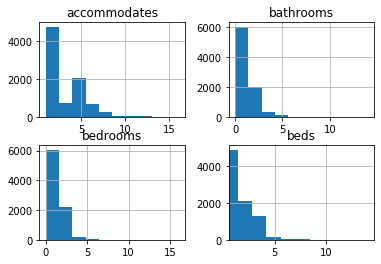

In [72]:
#df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,8));
df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist();
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()


As we can see most listings have one bedroom,one bed and one bathroom.<br>
Next I want to see if the place accomodate more people how will the price be:

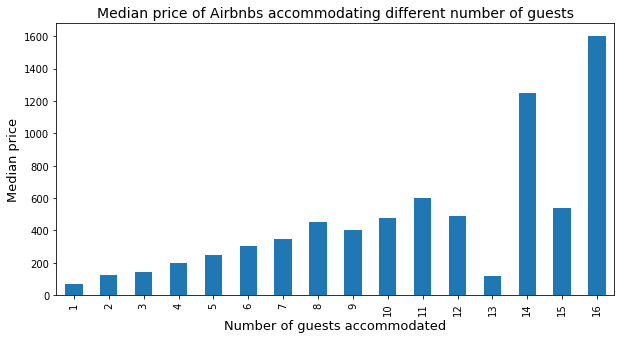

In [73]:

plt.figure(figsize=(10,5))
df.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price', fontsize=13)
plt.show()

for the most part the price goes up as the number of guest goes up but there is a surprising dip when the number is 13 which we will look more into.


In [74]:
df.loc[df['accommodates'] == 13]

,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_60,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot_water,Luggage_dropoff,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Private_living_room,Single_level_home,Paid_parking_on_premises,Safety_card,Keypad,Stair_gates,Doorman_Staff,Laptop_friendly_workspace,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24hour_checkin,Self_checkin,Air_conditioning,BBQ_grill,Balcony,Wine_cooler,Waterfront,Smoking_allowed,Pets
6828,Inner Sunset,West of Twin Peaks,94127,37.74097,-122.4669,House,Entire home/apt,13,3.0,4.0,7.0,115,0,100,1,0,5 months ago,37,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


There is only one record where it accomodates 13 people. It has 4 bedrooms and 3 bedrooms so we can possibly keep it.

We also see the avg price for listings that accomodate 15 guests are also lower compared to 14 and 16 . So we take a look at those at well.

In [75]:
df.loc[df['accommodates'] == 15]

,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_60,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot_water,Luggage_dropoff,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Private_living_room,Single_level_home,Paid_parking_on_premises,Safety_card,Keypad,Stair_gates,Doorman_Staff,Laptop_friendly_workspace,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24hour_checkin,Self_checkin,Air_conditioning,BBQ_grill,Balcony,Wine_cooler,Waterfront,Smoking_allowed,Pets
370,SoMa,South of Market,94103,37.78128,-122.40346,Loft,Entire home/apt,15,1.0,1.0,2.0,975,0,50,3,0,today,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,1,0,0,0,0
953,Richmond District,Golden Gate Park,94121,37.77026,-122.49901,House,Entire home/apt,15,3.0,4.0,6.0,889,3000,189,8,50,today,17,1,0,0,1,1,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,1,0,0,0,0
3759,Lakeshore,Lakeshore,94132,37.73404,-122.47484,House,Entire home/apt,15,4.5,4.0,6.0,260,500,290,8,25,2 weeks ago,39,1,0,0,1,1,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,1,1,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0
5124,Sunnyside,West of Twin Peaks,94127,37.74184,-122.45374,House,Entire home/apt,15,3.0,5.0,9.0,316,3500,280,6,25,6 months ago,18,1,0,0,1,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
6133,SoMa,South of Market,94103,37.78206,-122.40410,Loft,Entire home/apt,15,1.0,1.0,1.0,1000,0,0,12,0,today,54,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0
8031,Richmond District,Outer Richmond,94121,37.77985,-122.48682,Apartment,Entire home/apt,15,2.0,4.0,11.0,535,1000,185,8,25,today,15,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
8519,Richmond District,Outer Richmond,94121,37.78200,-122.48643,Apartment,Entire home/apt,15,2.0,4.0,10.0,385,800,185,8,25,yesterday,13,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [76]:
df.head()

,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_60,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot_water,Luggage_dropoff,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Private_living_room,Single_level_home,Paid_parking_on_premises,Safety_card,Keypad,Stair_gates,Doorman_Staff,Laptop_friendly_workspace,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24hour_checkin,Self_checkin,Air_conditioning,BBQ_grill,Balcony,Wine_cooler,Waterfront,Smoking_allowed,Pets
0,Duboce Triangle,Western Addition,94117,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,170,100,100,2,25,7 weeks ago,4,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1
1,Inner Sunset,Inner Sunset,94131,37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,99,0,10,2,20,today,44,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Bernal Heights,Bernal Heights,94110,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,235,0,100,2,0,2 months ago,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,Cole Valley,Haight Ashbury,94117,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,65,200,50,1,12,3 weeks ago,60,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,Cole Valley,Haight Ashbury,94117,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,65,200,50,1,12,4 months ago,60,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


What is the most common property that is listed?

In [77]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

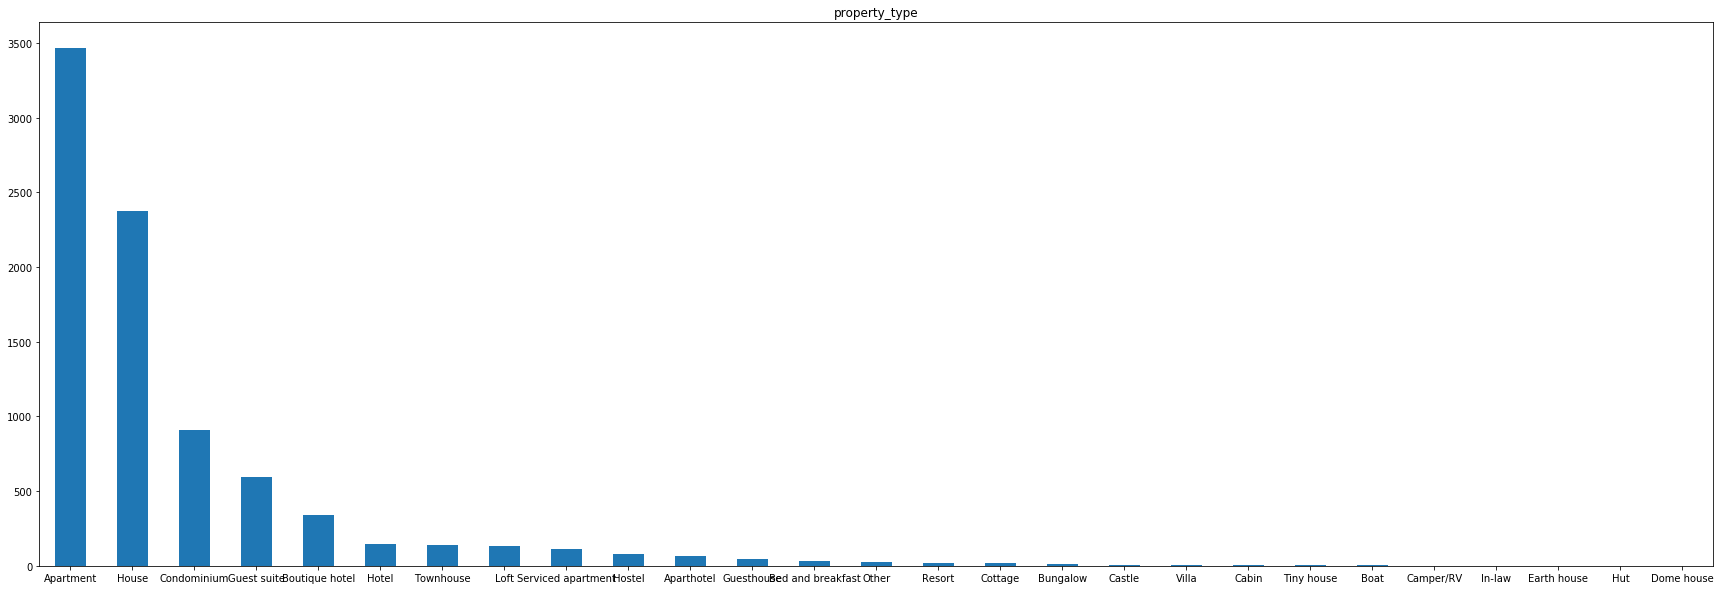

Apartment             0.406118
House                 0.278364
Condominium           0.106657
Guest suite           0.069386
Boutique hotel        0.039616
Hotel                 0.016995
Townhouse             0.016643
Loft                  0.015471
Serviced apartment    0.012893
Hostel                0.009025
Aparthotel            0.007736
Guesthouse            0.005274
Bed and breakfast     0.003868
Other                 0.002696
Resort                0.002110
Cottage               0.001992
Bungalow              0.001758
Castle                0.000703
Villa                 0.000703
Cabin                 0.000352
Tiny house            0.000352
Boat                  0.000352
Camper/RV             0.000234
In-law                0.000234
Earth house           0.000234
Hut                   0.000117
Dome house            0.000117
Name: property_type, dtype: float64


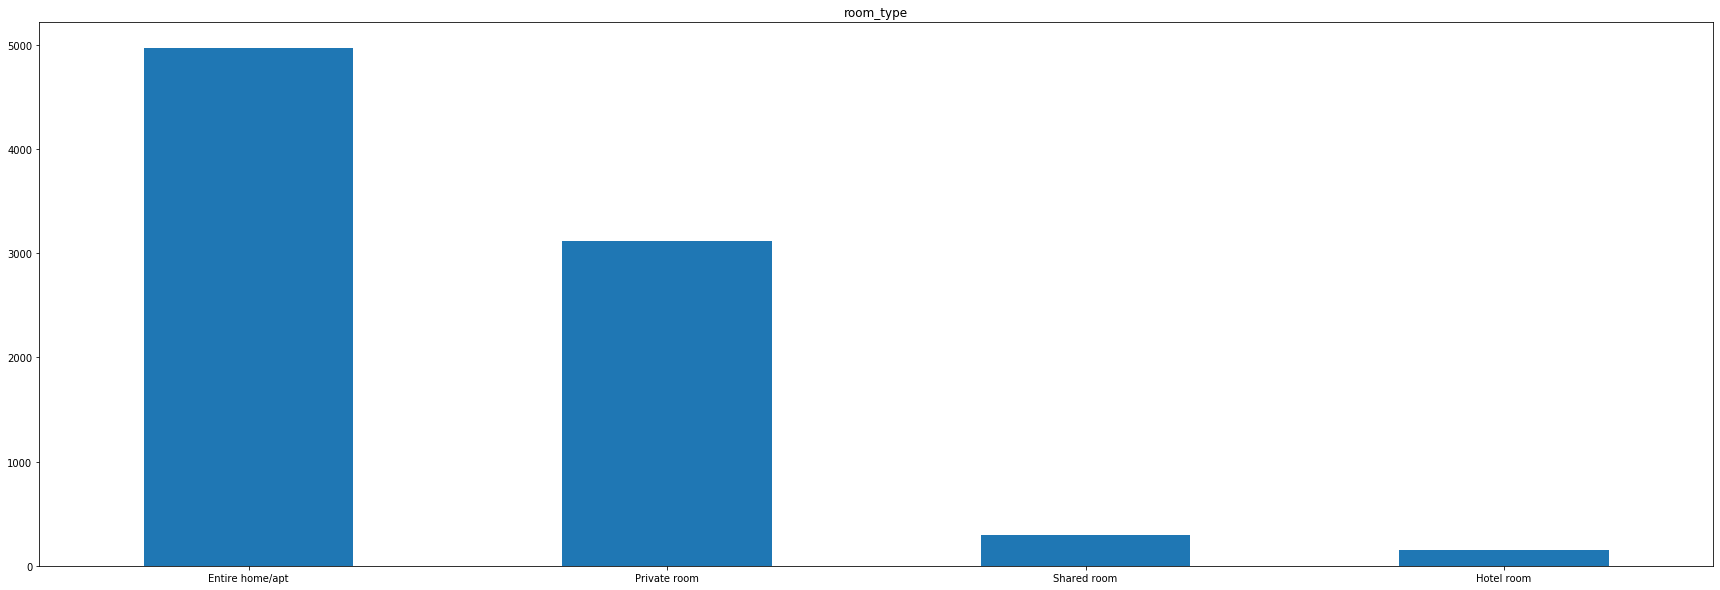

Entire home/apt    0.582044
Private room       0.365565
Shared room        0.034341
Hotel room         0.018050
Name: room_type, dtype: float64


In [78]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(30,10))
    print(df[col].value_counts(normalize=True))

We can see apartments are the most common with almost half of the listings , following by the house and condominion.<br>
Also if we look at the type of room more than half of the listings are the entire home/apt.

In [79]:
df["neighbourhood_cleansed"].value_counts()

Mission                  789
Downtown/Civic Center    761
South of Market          751
Western Addition         630
Castro/Upper Market      471
Haight Ashbury           413
Bernal Heights           411
Noe Valley               336
Nob Hill                 323
Outer Sunset             319
Potrero Hill             250
Inner Richmond           227
Bayview                  226
Financial District       205
Marina                   194
North Beach              190
Excelsior                189
Russian Hill             189
Outer Richmond           188
Outer Mission            180
Inner Sunset             171
Pacific Heights          161
Ocean View               144
West of Twin Peaks       144
Parkside                 142
Chinatown                139
Visitacion Valley         76
Twin Peaks                69
Glen Park                 66
Lakeshore                 59
Crocker Amazon            49
Presidio Heights          23
Seacliff                  22
Diamond Heights           17
Golden Gate Pa

In [80]:
df["neighbourhood"].value_counts()

Mission District         786
SoMa                     641
Western Addition/NOPA    467
Richmond District        439
Outer Sunset             413
Downtown                 395
Bernal Heights           395
Nob Hill                 386
Noe Valley               360
The Castro               353
Haight-Ashbury           235
Bayview                  223
Potrero Hill             215
Pacific Heights          181
Tenderloin               180
Inner Sunset             159
Union Square             158
Telegraph Hill           151
Duboce Triangle          147
Excelsior                135
South Beach              124
Sunnyside                119
Cole Valley              119
Russian Hill             111
Marina                   106
Hayes Valley             106
Crocker Amazon            94
Lower Haight              88
Chinatown                 79
Financial District        77
Mission Terrace           74
Portola                   72
Twin Peaks                70
Glen Park                 70
Cow Hollow    

In [81]:
"""
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='BuPu',annot=True)
plt.show() #correlation map
"""


"\nimport seaborn as sns\nplt.figure(figsize=(20,15))\nsns.heatmap(df.corr(),cmap='BuPu',annot=True)\nplt.show() #correlation map\n"

In [82]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [83]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('price ~ beds',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     815.6
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          2.21e-171
Time:                        05:33:18   Log-Likelihood:                -60309.
No. Observations:                8520   AIC:                         1.206e+05
Df Residuals:                    8518   BIC:                         1.206e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.4520      5.489     15.751      0.0

## Using the regression Model

In [84]:
df

,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_60,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot_water,Luggage_dropoff,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Private_living_room,Single_level_home,Paid_parking_on_premises,Safety_card,Keypad,Stair_gates,Doorman_Staff,Laptop_friendly_workspace,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24hour_checkin,Self_checkin,Air_conditioning,BBQ_grill,Balcony,Wine_cooler,Waterfront,Smoking_allowed,Pets
0,Duboce Triangle,Western Addition,94117,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,170,100,100,2,25,7 weeks ago,4,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1
1,Inner Sunset,Inner Sunset,94131,37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,99,0,10,2,20,today,44,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Bernal Heights,Bernal Heights,94110,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,235,0,100,2,0,2 months ago,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,Cole Valley,Haight Ashbury,94117,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,65,200,50,1,12,3 weeks ago,60,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,Cole Valley,Haight Ashbury,94117,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,65,200,50,1,12,4 months ago,60,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,NaN,Pacific Heights,94115,37.79017,-122.43869,Apartment,Entire home/apt,2,1.5,1.0,2.0,95,0,50,1,0,yesterday,32,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
8529,NaN,Bayview,94124,37.71977,-122.39214,Apartment,Private room,2,1.0,1.0,NaN,55,0,0,1,0,today,59,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8530,NaN,Treasure Island/YBI,94130,37.81704,-122.36999,Boat,Entire home/apt,2,0.5,1.0,1.0,100,500,100,2,0,yesterday,53,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8531,NaN,Pacific Heights,94115,37.79179,-122.43021,Condominium,Entire home/apt,3,1.0,1.0,1.0,295,0,0,1,0,today,4,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0

In [85]:
df["calendar_updated"].value_counts()

today            1448
2 weeks ago       787
3 months ago      650
3 weeks ago       617
a week ago        593
                 ... 
43 months ago       1
66 months ago       1
39 months ago       1
81 months ago       1
46 months ago       1
Name: calendar_updated, Length: 66, dtype: int64

In [86]:
# this will need some cleanup
df["property_type"].value_counts()

Apartment             3465
House                 2375
Condominium            910
Guest suite            592
Boutique hotel         338
Hotel                  145
Townhouse              142
Loft                   132
Serviced apartment     110
Hostel                  77
Aparthotel              66
Guesthouse              45
Bed and breakfast       33
Other                   23
Resort                  18
Cottage                 17
Bungalow                15
Castle                   6
Villa                    6
Cabin                    3
Tiny house               3
Boat                     3
Camper/RV                2
In-law                   2
Earth house              2
Hut                      1
Dome house               1
Name: property_type, dtype: int64

In [87]:
"""
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartme
    nt',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'
"""

"\n# Replacing categories that are types of houses or apartments\ndf.property_type.replace({\n    'Townhouse': 'House',\n    'Serviced apartment': 'Apartme\n    nt',\n    'Loft': 'Apartment',\n    'Bungalow': 'House',\n    'Cottage': 'House',\n    'Villa': 'House',\n    'Tiny house': 'House',\n    'Earth house': 'House',\n    'Chalet': 'House'  \n    }, inplace=True)\n\n# Replacing other categories with 'other'\ndf.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'\n"

In [88]:
# this will need some cleanup
df["room_type"].value_counts()

Entire home/apt    4966
Private room       3119
Shared room         293
Hotel room          154
Name: room_type, dtype: int64

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge

#imp = SimpleImputer(missing_values= 'NaN', strategy='median')
#imp = SimpleImputer(missing_values=np.nan, strategy='median') # feel free to use others strategy

In [90]:
#df[['bathrooms']]  = imp.fit_transform(df[['bathrooms']])

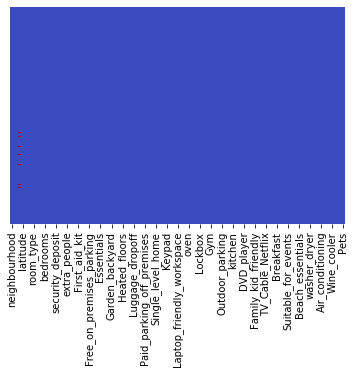

In [91]:
#df[['bathrooms']] 
sns.heatmap(df.isnull(),yticklabels=False, cbar= False,cmap='coolwarm')

In [92]:
#df['neighbourhood'].unique()

In [93]:
df['neighbourhood_cleansed'].unique()


array(['Western Addition', 'Inner Sunset', 'Bernal Heights',
       'Haight Ashbury', 'Mission', 'Potrero Hill', 'Nob Hill',
       'Downtown/Civic Center', 'Castro/Upper Market', 'South of Market',
       'Noe Valley', 'Outer Richmond', 'Presidio Heights', 'Glen Park',
       'Ocean View', 'Pacific Heights', 'Financial District',
       'Twin Peaks', 'Russian Hill', 'Outer Sunset', 'Marina',
       'Inner Richmond', 'Excelsior', 'Seacliff', 'Chinatown',
       'West of Twin Peaks', 'Bayview', 'North Beach', 'Diamond Heights',
       'Outer Mission', 'Parkside', 'Lakeshore', 'Crocker Amazon',
       'Golden Gate Park', 'Visitacion Valley', 'Presidio',
       'Treasure Island/YBI'], dtype=object)

In [94]:
df.drop(['neighbourhood'], axis=1, inplace=True)

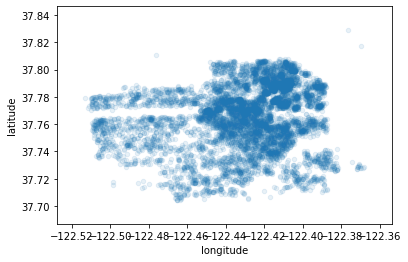

In [95]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [96]:
df.head()

,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_60,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot_water,Luggage_dropoff,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Private_living_room,Single_level_home,Paid_parking_on_premises,Safety_card,Keypad,Stair_gates,Doorman_Staff,Laptop_friendly_workspace,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24hour_checkin,Self_checkin,Air_conditioning,BBQ_grill,Balcony,Wine_cooler,Waterfront,Smoking_allowed,Pets
0,Western Addition,94117,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,170,100,100,2,25,7 weeks ago,4,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1
1,Inner Sunset,94131,37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,99,0,10,2,20,today,44,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Bernal Heights,94110,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,235,0,100,2,0,2 months ago,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,Haight Ashbury,94117,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,65,200,50,1,12,3 weeks ago,60,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,Haight Ashbury,94117,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,65,200,50,1,12,4 months ago,60,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [97]:
#df.drop(['latitude', 'longitude'], axis=1, inplace=True)
#df.info()

In [98]:
#df.info()

### Machine Learning Model

In [99]:
numerical_features = ['accommodates', 'availability_60', 'bathrooms', 'bedrooms', 'beds','latitude', 'longitude',
                     'cleaning_fee', 'guests_included', 'security_deposit']

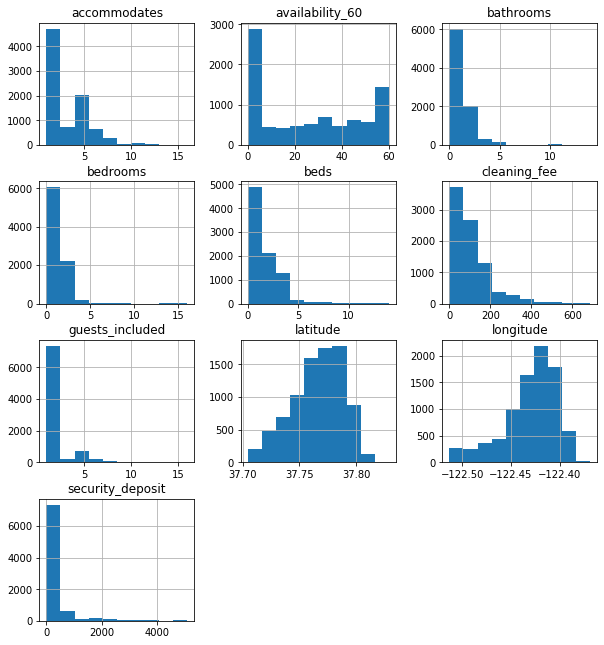

In [100]:
df[numerical_features].hist(figsize=(10,11));

In [101]:
""""
# Log transforming columns
numerical_features = [i for i in numerical_features 
                     if i not in ['availability_60']] # Removing items not to be transformed

for col in numerical_features:
    df[col] = df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df[col] = np.log(df[col])
    """


'"\n# Log transforming columns\nnumerical_features = [i for i in numerical_features \n                     if i not in [\'availability_60\']] # Removing items not to be transformed\n\nfor col in numerical_features:\n    df[col] = df[col].astype(\'float64\').replace(0.0, 0.01) # Replacing 0s with 0.01\n    df[col] = np.log(df[col])\n    '

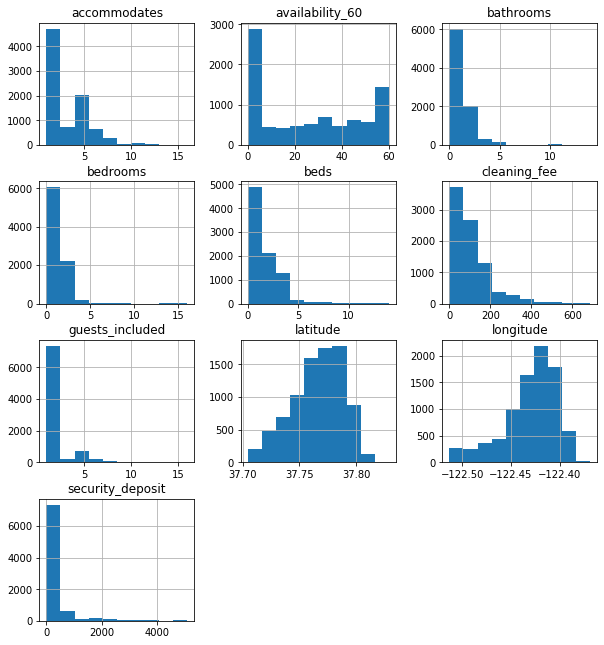

In [102]:
df[numerical_features].hist(figsize=(10,11));

In [103]:
#categorical_features = list(df.columns[df.dtypes == 'object'])
categorical_features = []
for col in df.columns:
    if col not in numerical_features:
        categorical_features += [col]
print(categorical_features)

['neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type', 'price', 'extra_people', 'calendar_updated', 'First_aid_kit', 'Exercise_equipment', 'Formal_dining_area', 'Free_on_premises_parking', 'Free_street_parking', 'Lake_access', 'Essentials', 'Fire_pit', 'Flat_path_guest_entrance', 'Garden_backyard', 'Hangers', 'Heat_lamps', 'Heated_floors', 'Heating', 'Hot_water', 'Luggage_dropoff', 'Lock_on_bedroom_door', 'Mountain_view', 'Paid_parking_off_premises', 'toilet', 'Private_living_room', 'Single_level_home', 'Paid_parking_on_premises', 'Safety_card', 'Keypad', 'Stair_gates', 'Doorman_Staff', 'Laptop_friendly_workspace', 'Smart_lock', 'smoke_detector', 'oven', 'Elevator', 'Long_term_stays_allowed', 'Lockbox', 'EV_charger', 'Printer', 'Gym', 'Fire_extinguisher', 'Refigrator', 'Outdoor_parking', 'Outdoor_seating', 'Iron', 'kitchen', 'bath_essentials', 'bed_essentials', 'DVD_player', 'Breakfast_table', 'Ceiling_fan', 'Family_kid_friendly', 'coffe_machine', 'Cleaning_before_checkout

In [104]:
categorical_features.remove('price')


In [105]:
print(categorical_features)

['neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type', 'extra_people', 'calendar_updated', 'First_aid_kit', 'Exercise_equipment', 'Formal_dining_area', 'Free_on_premises_parking', 'Free_street_parking', 'Lake_access', 'Essentials', 'Fire_pit', 'Flat_path_guest_entrance', 'Garden_backyard', 'Hangers', 'Heat_lamps', 'Heated_floors', 'Heating', 'Hot_water', 'Luggage_dropoff', 'Lock_on_bedroom_door', 'Mountain_view', 'Paid_parking_off_premises', 'toilet', 'Private_living_room', 'Single_level_home', 'Paid_parking_on_premises', 'Safety_card', 'Keypad', 'Stair_gates', 'Doorman_Staff', 'Laptop_friendly_workspace', 'Smart_lock', 'smoke_detector', 'oven', 'Elevator', 'Long_term_stays_allowed', 'Lockbox', 'EV_charger', 'Printer', 'Gym', 'Fire_extinguisher', 'Refigrator', 'Outdoor_parking', 'Outdoor_seating', 'Iron', 'kitchen', 'bath_essentials', 'bed_essentials', 'DVD_player', 'Breakfast_table', 'Ceiling_fan', 'Family_kid_friendly', 'coffe_machine', 'Cleaning_before_checkout', 'TV_Ca

In [106]:
#train = encode(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8532 entries, 0 to 8532
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   neighbourhood_cleansed     8532 non-null   object 
 1   zipcode                    8287 non-null   object 
 2   latitude                   8532 non-null   float64
 3   longitude                  8532 non-null   float64
 4   property_type              8532 non-null   object 
 5   room_type                  8532 non-null   object 
 6   accommodates               8532 non-null   int64  
 7   bathrooms                  8527 non-null   float64
 8   bedrooms                   8529 non-null   float64
 9   beds                       8520 non-null   float64
 10  price                      8532 non-null   int64  
 11  security_deposit           8532 non-null   int64  
 12  cleaning_fee               8532 non-null   int64  
 13  guests_included            8532 non-null   int64

Using Lasso Regression with GridSearch. All thse will be in pipeline


In [107]:
df.price


0       170
1        99
2       235
3        65
4        65
       ... 
8528     95
8529     55
8530    100
8531    295
8532     60
Name: price, Length: 8532, dtype: int64

In [108]:
#df

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error

lasso_reg = Lasso(max_iter = 1000)
#param_grid =dict(alpha=np.logspace(-4,1,50))
#grid_lasso = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

#numeric_features = ['beds']

#numeric_features = ['bathrooms', 'bedrooms', 'beds']
#numeric_features =['lattitude','longtitude']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))#,
   # ('scaler', StandardScaler())])
    ])
#categorical_features = ['zipcode','neighbourhood_cleansed']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

#scorer = make_scorer(mean_squared_error, greater_is_better=False)





# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
ridge_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('predict', lasso_reg)])
                      #('regressor', Ridge())])
                        
y = df.price
X = df.drop('price', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)



# Applying k-Fold Cross Validation

#accuracies = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train, cv = 10)
#accuracies.mean()
#accuracies.std()

# Applying Grid Search to find the best model and the best parameters


#parameters = [ {'model__alpha': np.arange(0, 0.2, 0.01) } ]
#parameters = []
#lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
#ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}


params = [
    {
     'predict__alpha':[0.001, 0.01, 0.1 , 1, 10,100]
    }
]


scoring_func = make_scorer(mean_squared_error)

grid_search = GridSearchCV(estimator = ridge_pipe, 
                           param_grid = params,
                           scoring = scoring_func,
                           cv = 10,
                          n_jobs = -1, # to use all cpus
                          verbose = 9)
                           
#refit = True
grid_search = grid_search.fit(X_train, y_train) 

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   56.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   56.9s finished
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96098629.40412748, tolerance: 58509.05917224908
  max_iter, tol, rng, random, positive)


In [110]:

# See what type of object the best_estimator_ property is
print(type(grid_search.best_estimator_))

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_search.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])


#y_test_array = y_test.values
print("y_test\n", y_test)
#print("y_test_array\n" ,y_test_array)

from sklearn.metrics import r2_score
r2=r2_score(y_test ,predictions)
print('R2 score of the linear regression is: ',r2)


<class 'sklearn.pipeline.Pipeline'>
[216.28337852 197.75958481 174.96368815 456.34144397 125.59816884]
y_test
 7456     95
5758    211
5761    141
4761    200
1539    249
       ... 
8375    100
7494    350
6026    259
5344    150
8044     70
Name: price, Length: 1707, dtype: int64
R2 score of the linear regression is:  0.10373800025258273


In [111]:
print(predictions)

[216.28337852 197.75958481 174.96368815 ... 256.66233511 175.92420705
  61.98901439]


In [112]:
print(df.price)

0       170
1        99
2       235
3        65
4        65
       ... 
8528     95
8529     55
8530    100
8531    295
8532     60
Name: price, Length: 8532, dtype: int64


In [113]:
df

,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_60,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot_water,Luggage_dropoff,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Private_living_room,Single_level_home,Paid_parking_on_premises,Safety_card,Keypad,Stair_gates,Doorman_Staff,Laptop_friendly_workspace,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24hour_checkin,Self_checkin,Air_conditioning,BBQ_grill,Balcony,Wine_cooler,Waterfront,Smoking_allowed,Pets
0,Western Addition,94117,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,170,100,100,2,25,7 weeks ago,4,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1
1,Inner Sunset,94131,37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,99,0,10,2,20,today,44,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Bernal Heights,94110,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,235,0,100,2,0,2 months ago,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,Haight Ashbury,94117,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,65,200,50,1,12,3 weeks ago,60,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,Haight Ashbury,94117,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,65,200,50,1,12,4 months ago,60,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,Pacific Heights,94115,37.79017,-122.43869,Apartment,Entire home/apt,2,1.5,1.0,2.0,95,0,50,1,0,yesterday,32,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
8529,Bayview,94124,37.71977,-122.39214,Apartment,Private room,2,1.0,1.0,NaN,55,0,0,1,0,today,59,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8530,Treasure Island/YBI,94130,37.81704,-122.36999,Boat,Entire home/apt,2,0.5,1.0,1.0,100,500,100,2,0,yesterday,53,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8531,Pacific Heights,94115,37.79179,-122.43021,Condominium,Entire home/apt,3,1.0,1.0,1.0,295,0,0,1,0,today,4,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0


In [114]:
#df.info()

In [115]:
cv_result_df = pd.DataFrame(grid_search.cv_results_)
print(cv_result_df.shape)
#print(cv_result_df)

(6, 19)


In [116]:
"""fit_model['preprocessor'].transformers_[1][1]['onehot']\
                         .get_feature_names(categorical_features)
                         """

"fit_model['preprocessor'].transformers_[1][1]['onehot']                         .get_feature_names(categorical_features)\n                         "

In [117]:
fit_model = grid_search.best_estimator_
print (fit_model)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [118]:
#fit_model.steps[1][1].feature_importances_
#fit_model.steps[0][1].get_feature_names() 

In [119]:
type(grid_search.best_estimator_)

sklearn.pipeline.Pipeline

In [120]:
preproc = fit_model.named_steps['preprocessor']

In [121]:
X_train_tranformed = preproc.transform(X_train)

In [122]:
#fit_model.named_steps['preprocessor'].get_feature_names()

In [123]:
(X_train).shape


(6825, 89)

In [124]:
(X_train_tranformed).shape


(6825, 412)

In [125]:
#model = fit_model.named_steps['predict']

#Pipeline.get_params().keys()

In [126]:
model = fit_model.named_steps['predict']

#Pipeline.get_params().keys()

In [127]:

print(("best regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best regression from grid search: 96728.979


In [128]:
print (len(model.coef_))
print(len(X_train.columns))

412
89


In [129]:
grid_search.best_params_

{'predict__alpha': 0.001}

In [130]:
grid_search.best_score_

76733.55074495761

In [131]:
fit_model = grid_search.best_estimator_
print (fit_model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [132]:
model = fit_model.named_steps['predict']

#Pipeline.get_params().keys()
print(model)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [133]:
print (len(model.coef_))
print(len(X_train.columns))

412
89


In [134]:
"""
#I will be putting Median for the missing values.
#remove this do it during model building with pipeline
#for col in ['bathrooms', 'bedrooms', 'beds']:
#    df[col].fillna(df[col].median(), inplace=True)from sklearn.pipeline import Pipeline

logreg = LogisticRegression()
steps=[('imputation',imp),('logistic_regression',logreg)]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)

#print(classification_report (y_test, y_pred))
"""

"\n#I will be putting Median for the missing values.\n#remove this do it during model building with pipeline\n#for col in ['bathrooms', 'bedrooms', 'beds']:\n#    df[col].fillna(df[col].median(), inplace=True)from sklearn.pipeline import Pipeline\n\nlogreg = LogisticRegression()\nsteps=[('imputation',imp),('logistic_regression',logreg)]\n\npipeline = Pipeline(steps)\n\nX_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 42)\n\npipeline.fit(X_train, y_train)\ny_pred = pipeline.predict(X_test)\n\npipeline.score(X_test, y_test)\n\n#print(classification_report (y_test, y_pred))\n"

In [135]:
#df.isnull().sum()

In [136]:

# See what type of object the best_estimator_ property is
print(type(grid_search.best_estimator_))

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_search.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])


#y_test_array = y_test.values
print("y_test\n", y_test)
#print("y_test_array\n" ,y_test_array)

from sklearn.metrics import r2_score
r2=r2_score(y_test ,predictions)
print('R2 score of the linear regression is: ',r2)


<class 'sklearn.pipeline.Pipeline'>
[216.28337852 197.75958481 174.96368815 456.34144397 125.59816884]
y_test
 7456     95
5758    211
5761    141
4761    200
1539    249
       ... 
8375    100
7494    350
6026    259
5344    150
8044     70
Name: price, Length: 1707, dtype: int64
R2 score of the linear regression is:  0.10373800025258273


In [137]:
print (type(predictions))
#print(type(y_test_array))

<class 'numpy.ndarray'>


In [138]:
df

,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_60,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot_water,Luggage_dropoff,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Private_living_room,Single_level_home,Paid_parking_on_premises,Safety_card,Keypad,Stair_gates,Doorman_Staff,Laptop_friendly_workspace,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24hour_checkin,Self_checkin,Air_conditioning,BBQ_grill,Balcony,Wine_cooler,Waterfront,Smoking_allowed,Pets
0,Western Addition,94117,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,170,100,100,2,25,7 weeks ago,4,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1
1,Inner Sunset,94131,37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,99,0,10,2,20,today,44,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Bernal Heights,94110,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,235,0,100,2,0,2 months ago,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,Haight Ashbury,94117,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,65,200,50,1,12,3 weeks ago,60,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,Haight Ashbury,94117,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,65,200,50,1,12,4 months ago,60,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,Pacific Heights,94115,37.79017,-122.43869,Apartment,Entire home/apt,2,1.5,1.0,2.0,95,0,50,1,0,yesterday,32,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
8529,Bayview,94124,37.71977,-122.39214,Apartment,Private room,2,1.0,1.0,NaN,55,0,0,1,0,today,59,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8530,Treasure Island/YBI,94130,37.81704,-122.36999,Boat,Entire home/apt,2,0.5,1.0,1.0,100,500,100,2,0,yesterday,53,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8531,Pacific Heights,94115,37.79179,-122.43021,Condominium,Entire home/apt,3,1.0,1.0,1.0,295,0,0,1,0,today,4,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0


In [139]:
y_train.mean()

216.9176556776557

In [140]:
y_test.mean()


209.41359109548915

In [141]:
pd.Series(predictions).value_counts()

238.062250    1
345.697091    1
311.248957    1
395.249303    1
102.992024    1
             ..
180.683582    1
154.402412    1
28.945592     1
426.626922    1
118.843808    1
Length: 1707, dtype: int64

In [142]:
#X_train['zipcode'].value_counts()

In [143]:

#feature_importances = grid_search.best_estimator_.feature_importances_


In [147]:
pd.set_option('display.max_rows', 100)
# Grabbing the preprocessor
pre = fit_model.named_steps['preprocessor']

# Getting the numerical and categorical features from the pipeline
num_feats = pre.transformers_[0][2]
cat_feats = pre.transformers_[1][1]['onehot']\
                   .get_feature_names(categorical_features)
all_feats = num_feats+list(cat_feats)

# Dataframe for visual examination of coefficients
df_coefs = pd.DataFrame()
df_coefs['feature'] = all_feats
df_coefs['coefficient'] = model.coef_

# Filter out all but the coefficients with some significance
df_coefs[df_coefs['coefficient'] > .01]

,feature,coefficient
0,accommodates,32.998214
1,availability_60,0.144910
3,bedrooms,49.265391
5,latitude,503.163434
6,longitude,407.560361
...,...,...
392,washer_dryer_0,10.805222
394,24hour_checkin_0,8.103986
396,Self_checkin_0,25.084034
406,Waterfront_0,7.703556
